## Importing libraries and data

In [56]:
"!pip install matplotlib  !pip install seaborn !pip install yfinance !pip install pandas-datareader pip install --upgrade pandas-datareader pandas"

'!pip install matplotlib  !pip install seaborn !pip install yfinance !pip install pandas-datareader pip install --upgrade pandas-datareader pandas'

In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [58]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-20,98.410004,98.480003,95.699997,97.709999,97.709999,62388900,AMAZON
2023-03-21,98.139999,100.849998,98.000000,100.610001,100.610001,58597300,AMAZON
2023-03-22,100.449997,102.099998,98.610001,98.699997,98.699997,57475400,AMAZON
2023-03-23,100.430000,101.059998,97.620003,98.709999,98.709999,57559300,AMAZON
2023-03-24,98.070000,98.300003,96.400002,98.129997,98.129997,56095400,AMAZON



Open: Precio de apertura o cotización de apertura de un valor en el mercado en un día determinado.


High: El precio más alto que alcanzó un valor en el mercado durante un día determinado.


Low: El precio más bajo que alcanzó un valor en el mercado durante un día determinado.


Close: Precio de cierre o cotización de cierre de un valor en el mercado en un día determinado.


Adj Close: Precio de cierre ajustado de un valor en el mercado en un día determinado, que tiene en cuenta los ajustes por dividendos, divisiones de acciones y otras acciones corporativas que pueden afectar el precio.


Volume: Volumen o cantidad total de acciones o valores negociados en el mercado durante un día determinado.

## Descriptive statistics about data

In [59]:
# Microsof 
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,257.945280,261.232759,254.675319,258.016040,256.645082,2.990521e+07
std,20.024269,19.915007,19.760865,19.908993,19.419530,1.024409e+07
min,217.550003,220.410004,213.429993,214.250000,213.114120,9.200800e+06
25%,243.120003,245.302502,240.187500,242.307495,241.437767,2.285672e+07
50%,256.345001,259.639999,252.650002,255.080002,254.442696,2.816780e+07
75%,271.704994,274.637497,267.474998,271.092506,269.721901,3.364002e+07
max,313.910004,315.950012,311.579987,315.410004,312.345795,8.610200e+07


In [60]:
#Apple 
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,149.804440,151.880080,147.898680,149.954440,149.494086,8.215348e+07
std,11.639943,11.531572,11.663140,11.604461,11.470510,2.359775e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.519590e+07
25%,142.099998,143.722496,139.924995,142.457497,141.965420,6.764752e+07
50%,148.864998,150.889999,147.200005,149.295006,148.892677,7.699575e+07
75%,156.062500,158.015003,154.034996,156.720005,155.844021,9.025605e+07
max,178.550003,179.610001,176.699997,178.960007,177.882462,1.826020e+08


In [61]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-03-28 to 2023-03-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## Historical view of the closing price

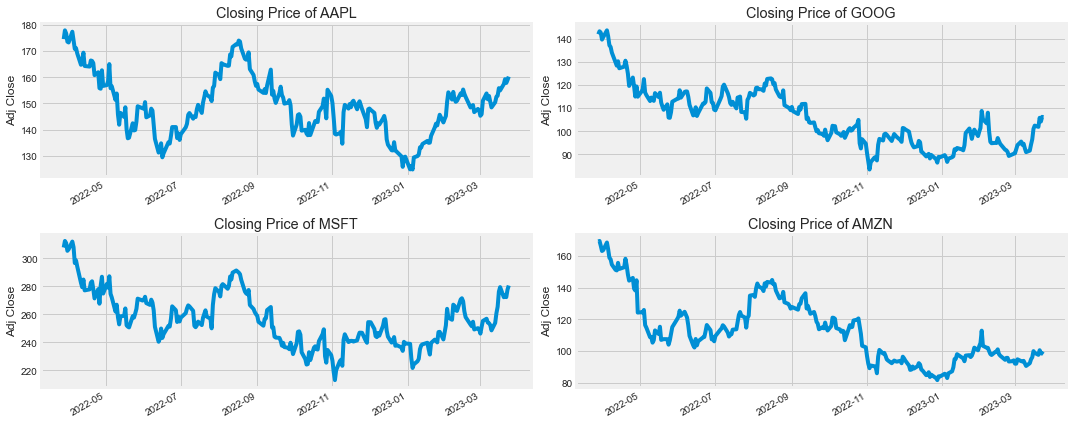

In [62]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Moving average of stocks

In [63]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

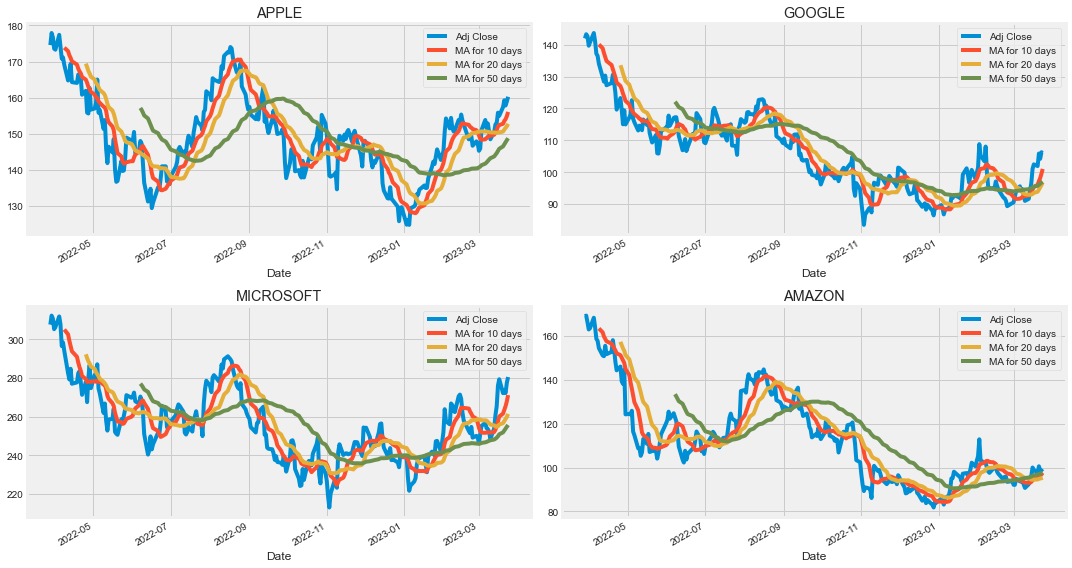

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Predicting the closing price stock price of APPLE inc

In [65]:
# Get the stock quote
df = DataReader ('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

TypeError: string indices must be integers

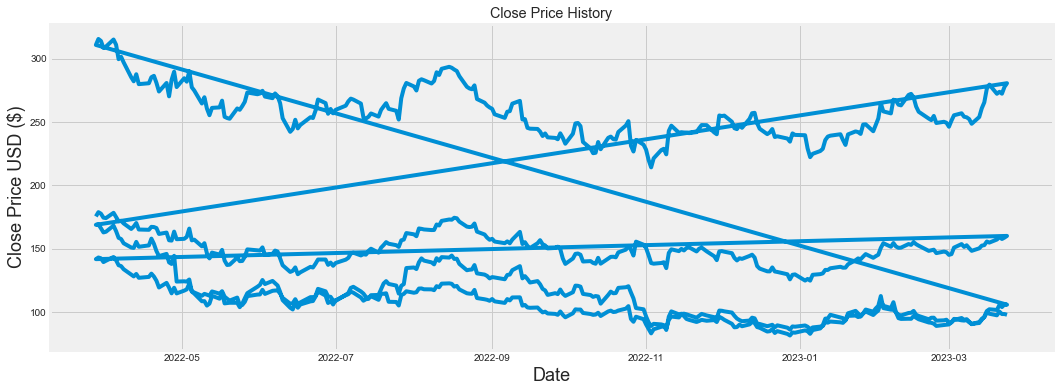

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

950

In [ ]:
# Importar MinMaxScaler de la biblioteca sklearn
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia de MinMaxScaler con un rango de características de 0 a 1
scaler = MinMaxScaler(feature_range=(0,1))

# Ajustar y transformar el conjunto de datos utilizando el escalador
scaled_data = scaler.fit_transform(dataset)

# Mostrar los datos escalados
scaled_data

array([[0.40147269],
       [0.41585687],
       [0.41076246],
       [0.39723447],
       [0.39595015],
       [0.41363073],
       [0.39916091],
       [0.38533328],
       [0.38666038],
       [0.37788431],
       [0.35930476],
       [0.3674815 ],
       [0.37921141],
       [0.35733547],
       [0.35639371],
       [0.36636839],
       [0.36564063],
       [0.36217303],
       [0.34235195],
       [0.3470183 ],
       [0.32098978],
       [0.32000516],
       [0.35027184],
       [0.32462859],
       [0.32595576],
       [0.33246284],
       [0.36046065],
       [0.32086135],
       [0.32304464],
       [0.30069779],
       [0.31118624],
       [0.27689541],
       [0.26002824],
       [0.27950683],
       [0.27278562],
       [0.28862539],
       [0.25257933],
       [0.23772424],
       [0.23875164],
       [0.26238281],
       [0.25061004],
       [0.25129502],
       [0.26525107],
       [0.29033777],
       [0.28691295],
       [0.28635646],
       [0.29705897],
       [0.272

In [ ]:
# Crear el conjunto de datos de entrenamiento escalado
train_data = scaled_data[0:int(training_data_len), :]

# Dividir los datos en conjuntos de datos x_train y y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convertir x_train y y_train en matrices numpy
x_train, y_train = np.array(x_train), np.array(y_train)

# Reorganizar los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.40147269, 0.41585687, 0.41076246, 0.39723447, 0.39595015,
       0.41363073, 0.39916091, 0.38533328, 0.38666038, 0.37788431,
       0.35930476, 0.3674815 , 0.37921141, 0.35733547, 0.35639371,
       0.36636839, 0.36564063, 0.36217303, 0.34235195, 0.3470183 ,
       0.32098978, 0.32000516, 0.35027184, 0.32462859, 0.32595576,
       0.33246284, 0.36046065, 0.32086135, 0.32304464, 0.30069779,
       0.31118624, 0.27689541, 0.26002824, 0.27950683, 0.27278562,
       0.28862539, 0.25257933, 0.23772424, 0.23875164, 0.26238281,
       0.25061004, 0.25129502, 0.26525107, 0.29033777, 0.28691295,
       0.28635646, 0.29705897, 0.27210071, 0.27535425, 0.28635646,
       0.28314571, 0.26037073, 0.23678241, 0.21430714, 0.21807438,
       0.22950465, 0.20651568, 0.21293718, 0.23138831, 0.22916223])]
[0.24166275790441216]

[array([0.40147269, 0.41585687, 0.41076246, 0.39723447, 0.39595015,
       0.41363073, 0.39916091, 0.38533328, 0.38666038, 0.37788431,
       0.35930476, 0.3674815 , 0.37

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=2, epochs=2)

Epoch 1/2
445/445 [==============================] - 11s 19ms/step - loss: 0.0088
Epoch 2/2
445/445 [==============================] - 9s 19ms/step - loss: 0.0038


In [ ]:
# Crear el conjunto de datos de prueba
# Crear una nueva matriz que contenga valores escalados desde el índice 1543 hasta 2002
test_data = scaled_data[training_data_len - 60: , :]

# Crear los conjuntos de datos x_test y y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convertir los datos en una matriz numpy
x_test = np.array(x_test)

# Reorganizar los datos
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Obtener los valores de precio predichos por el modelo
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Obtener el error cuadrático medio (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 0s 12ms/step


2.979679139804109

C:\Users\admin\AppData\Local\Temp\ipykernel_3264\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


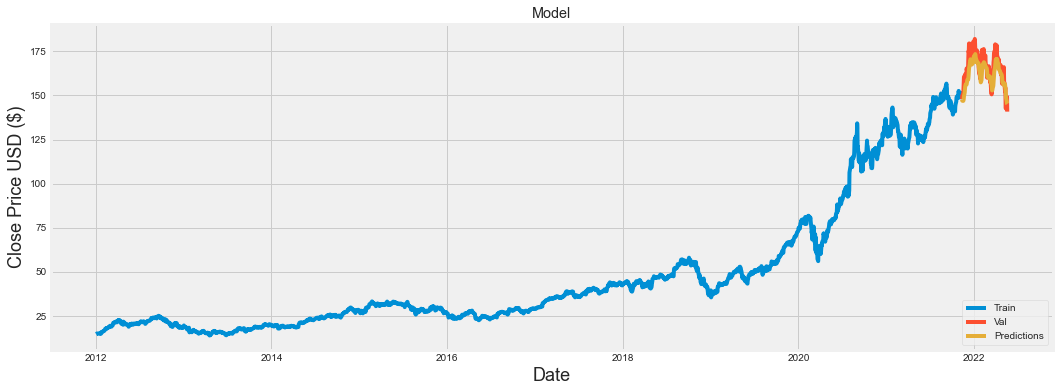

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

C:\Users\RICK\AppData\Local\Temp\ipykernel_11668\1528684354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


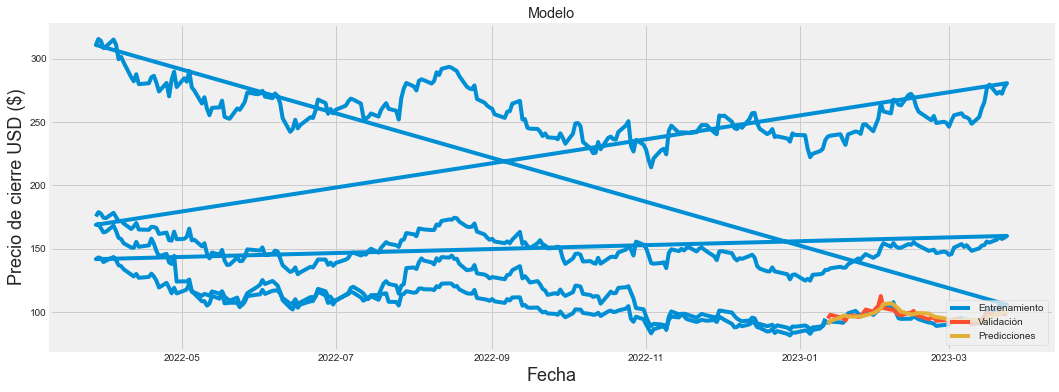

In [67]:
# Graficar los datos
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualizar los datos
plt.figure(figsize=(16,6))
plt.title('Modelo')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio de cierre USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Entrenamiento', 'Validación', 'Predicciones'], loc='lower right')
plt.show()

In [68]:
import altair as alt

# Preparar los datos
train = data[:training_data_len].reset_index()
valid = data[training_data_len:].reset_index()
valid['Predictions'] = predictions

# Crear la gráfica
chart = alt.Chart(train).mark_line().encode(
    x='Date',
    y='Close',
    color=alt.value('blue')
).properties(
    title='Modelo',
    width=800,
    height=400
)

chart += alt.Chart(valid).mark_line().encode(
    x='Date',
    y='Close',
    color=alt.value('red')
)

chart += alt.Chart(valid).mark_line().encode(
    x='Date',
    y='Predictions',
    color=alt.value('green')
)

chart = chart.configure_axis(
    labelFontSize=15,
    titleFontSize=18
).configure_title(
    fontSize=20
)

# Mostrar la gráfica
chart.display()

alt.LayerChart(...)

In [66]:
valid


,Date,Close,Predictions
0,2023-01-12,95.269997,90.766533
1,2023-01-13,98.120003,93.339455
2,2023-01-17,96.050003,95.926048
3,2023-01-18,95.459999,97.291733
4,2023-01-19,93.680000,97.563156
5,2023-01-20,97.250000,96.786819
6,2023-01-23,97.519997,96.629471
7,2023-01-24,96.320000,96.857796
8,2023-01-25,97.180000,96.896484
9,2023-01-26,99.220001,97.062057
